Este conjunto de datos obtiene el precio de casas expresado por unidad de area. Los datos contienen la fecha de la última transacción sobre la propiedad, la edad de la casa, la distancia a la estación de metro más cercana, la cantidad de tiendas cercanas, latitud y longitud.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("data/real_state.csv")
dataframe.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


Obteber el árbol de decisión óptimo para predecir el precio por unidad de área. Tener en cuenta que datos serán utilizados para la regresión y cuales seran descartados.

In [3]:
dataframe.drop(
    columns=[
        'No',
        'X1 transaction date',
        'X5 latitude',
        'X6 longitude'
    ], inplace=True
)

data = dataframe.values[:, :3]
data

array([[ 32.     ,  84.87882,  10.     ],
       [ 19.5    , 306.5947 ,   9.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       ...,
       [ 18.8    , 390.9696 ,   7.     ],
       [  8.1    , 104.8101 ,   5.     ],
       [  6.5    ,  90.45606,   9.     ]])

In [4]:
data_columns = list(dataframe.columns.values[:3])
target = dataframe.values[:, 3]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
print(X_train)

[[2.750000e+01 3.940173e+02 7.000000e+00]
 [1.770000e+01 4.516419e+02 8.000000e+00]
 [1.640000e+01 2.893248e+02 5.000000e+00]
 [1.250000e+01 5.619845e+02 5.000000e+00]
 [3.730000e+01 5.878877e+02 8.000000e+00]
 [9.100000e+00 1.402016e+06 0.000000e+00]
 [3.600000e+00 3.838624e+02 5.000000e+00]
 [1.720000e+01 3.905684e+02 5.000000e+00]
 [3.700000e+00 5.779615e+02 6.000000e+00]
 [1.100000e+00 1.935845e+02 6.000000e+00]
 [1.330000e+01 3.360532e+02 5.000000e+00]
 [1.330000e+01 4.922313e+02 5.000000e+00]
 [1.300000e+01 4.922313e+02 5.000000e+00]
 [3.500000e+00 7.573377e+02 3.000000e+00]
 [6.500000e+00 9.045606e+01 9.000000e+00]
 [3.350000e+01 1.978671e+06 2.000000e+00]
 [2.560000e+01 4.519690e+03 0.000000e+00]
 [3.000000e+01 1.013341e+06 5.000000e+00]
 [3.170000e+01 1.159454e+06 0.000000e+00]
 [4.100000e+00 3.128963e+02 5.000000e+00]
 [3.800000e+00 3.838624e+02 5.000000e+00]
 [8.900000e+00 1.406430e+03 0.000000e+00]
 [4.000000e+00 2.147376e+06 3.000000e+00]
 [9.900000e+00 2.791726e+02 7.0000

In [6]:
regression = DecisionTreeRegressor( max_depth=3)
regression = regression.fit(X_train, y_train.reshape(-1,1))
y_pred = regression.predict(X_test)

In [7]:
error =metrics.mean_squared_error(y_test,y_pred)
print(error)

105.46242432428521


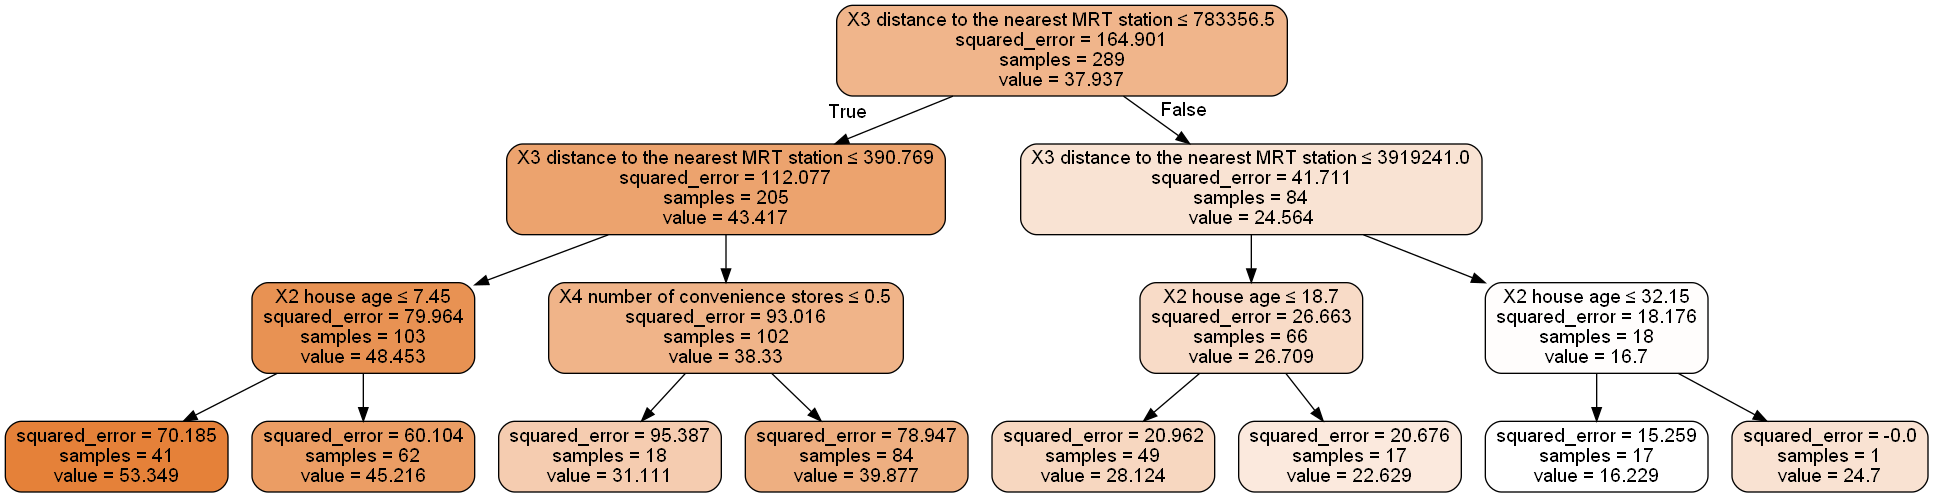

In [8]:
dot_data = StringIO()

export_graphviz(
    regression,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=data_columns
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


#### Como podemos observar las casas que se encuentran proximas a las zonas mas urbanas tendran un mayor valor que las casas que se encuentran lejos del radio centrico urbano. Por otro lado las viviendas mas nuevas seran mas costosas que las casas con mas años y por ultimo los hogares mas cercanos al metro seran mas costosas que las casas mas alejadas.